In [1]:
source = "all_reviewers.txt"

with open(source, "r", encoding='utf-8') as f:
    all_reviewers = f.readlines()
    
len(all_reviewers)

9394

In [2]:
# remove reviewers with more than 2 spaces

filtered_reviewers = []

for r in all_reviewers:
    r = r.replace("\n", "")
    if r.count(" ") == 1:
        filtered_reviewers.append(r)

len(filtered_reviewers)

8863

In [3]:
first_names = []
last_names = []

for r in filtered_reviewers:
    tmp = r.split(" ")
    first, last = tmp[0], tmp[1]
    first_names.append(first)
    last_names.append(last)

In [4]:
unique_first_names = set(first_names)
unique_last_names = set(last_names)

In [5]:
first_occ = []
last_occ = []

for uf in unique_first_names:
    occ = 0
    for f in first_names:
        if f == uf:
            occ += 1
    first_occ.append([uf, occ])
    
    
for ul in unique_last_names:
    occ = 0
    for l in last_names:
        if l == ul:
            occ += 1
    last_occ.append([ul, occ])

In [6]:
import pandas as pd
df_first = pd.DataFrame(first_occ)
df_last = pd.DataFrame(last_occ)

In [7]:
df_first = df_first.rename({0: 'firstname', 1: 'occ'}, axis=1)
df_last = df_last.rename({0: 'lastname', 1: 'occ'}, axis=1)

In [8]:
df_first.sort_values(by=['occ'], ascending=False)


,firstname,occ
4019,Michael,45
282,Alexander,40
5239,David,39
3973,Hao,38
2608,Wei,33
...,...,...
2000,Zaheer,1
2002,Wenhui,1
2003,Xiangru,1
2004,Guorun,1


In [9]:
df_last.sort_values(by=['occ'], ascending=False)

,lastname,occ
1282,Wang,358
201,Zhang,286
1755,Li,269
899,Liu,210
350,Chen,210
...,...,...
1439,Boddeti,1
1441,Maddox,1
1443,Przystupa,1
1445,Baradad,1


In [10]:
top20_first = df_first.sort_values(by=['occ'], ascending=False)[:20]
top20_last = df_last.sort_values(by=['occ'], ascending=False)[:20]

In [11]:
import seaborn as sns

Text(0.5, 1.0, 'Top20 most frequent LAST names of reviewers at NeurIPS2022')

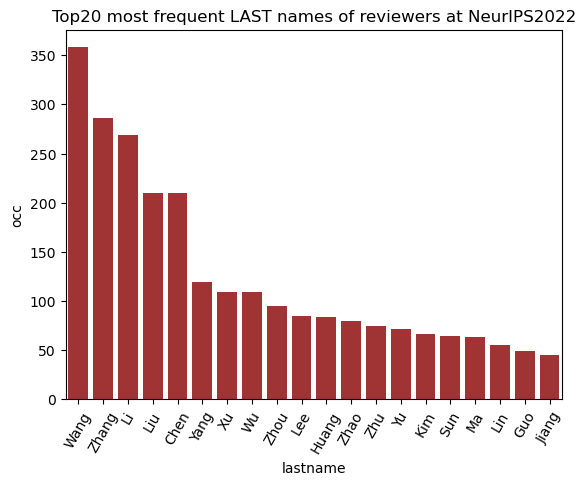

In [12]:
ax = sns.barplot(data=top20_last, x='lastname', y='occ', color='firebrick')
ax.tick_params(axis='x', rotation=60)
ax.set_title('Top20 most frequent LAST names of reviewers at NeurIPS2022')

Text(0.5, 1.0, 'Top20 most frequent FIRST names of reviewers at NeurIPS2022')

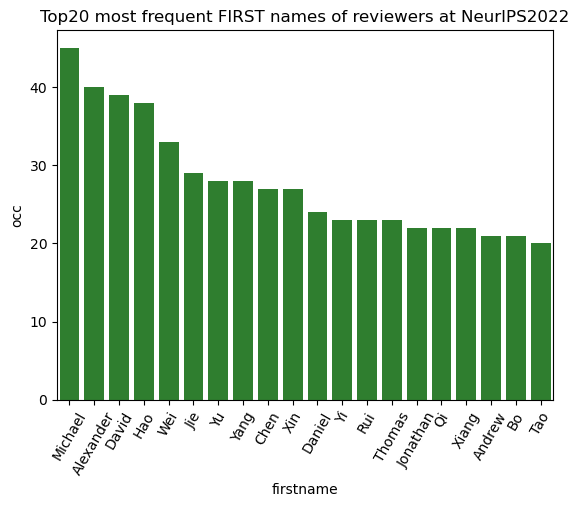

In [13]:
ax = sns.barplot(data=top20_first, x='firstname', y='occ', color='forestgreen')
ax.tick_params(axis='x', rotation=60)
ax.set_title('Top20 most frequent FIRST names of reviewers at NeurIPS2022')